<a href="https://colab.research.google.com/github/RadhikaR88/Melanoma-Detection/blob/master/RR_BuildingModels_Skin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Building Models**

In [0]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import  confusion_matrix
import math

import matplotlib.pyplot as plt

In [3]:
from keras import layers, regularizers, optimizers
from keras import models
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [4]:
# mount drive

from google.colab import drive
drive.mount('/content/gdrive')

%cd '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset


Increase the RAM trick

In [0]:
a=[]
while(1):
  a.append('1')

**Reading the numeric 128 x 128 image matrix**

In [0]:
np_p1 = np.load('/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/Rescaled_Data/Image_128_128_3_Unscaled/Image_128_128_part1.npy', allow_pickle=True)
np_p2 = np.load('/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/Rescaled_Data/Image_128_128_3_Unscaled/Image_128_128_part2.npy', allow_pickle=True)

In [53]:
print(np_p1.shape)
print(np_p2.shape)

(5000, 49153)
(5015, 49153)


**Scale the data**

1. Scale to [0 1]
2. Scale to [-1 1]

In [54]:
# extract data and labels - scale [0 1]

data=np.concatenate((np_p1[:,:-1],np_p2[:,:-1]),axis=0)
data=data.astype('float32')/255   # scale data between 0 and 1
print('All Data : ',data.shape)


label = np.concatenate((np_p1[:,-1],np_p2[:,-1]), axis=0)
print('All Label : ',label.shape)

All Data :  (10015, 49152)
All Label :  (10015,)


In [0]:
# extract data and labels - scale [-1 1]

data=np.concatenate((np_p1[:,:-1],np_p2[:,:-1]),axis=0)
data=data.astype('float32')/255   # scale data between -1 and 1
data=2*data-1
print('All Data : ',data.shape)


label = np.concatenate((np_p1[:,-1],np_p2[:,-1]), axis=0)
print('All Label : ',label.shape)

All Data :  (10015, 49152)
All Label :  (10015,)


In [55]:
df_total_scaled = pd.DataFrame(data)
print(df_total_scaled.shape)
print(df_total_scaled.columns)
df_total_scaled['label']=label
print(df_total_scaled.shape)

(10015, 49152)
RangeIndex(start=0, stop=49152, step=1)
(10015, 49153)


**Map labels from Meta data**

In [56]:
# reading the Meta Data file to map Melanoma types
metadata = pd.read_csv('HAM10000_metadata.csv')
print(metadata.shape)
metadata.head()

(10015, 7)


,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [57]:
# image id - dx dictionary
image_dict = dict(zip(metadata.image_id, metadata.dx))
print('Verify the number of images : ',len(image_dict))

# map it to the labels
df_total_scaled['dx']=df_total_scaled['label'].map(image_dict)
print(df_total_scaled.shape)

Verify the number of images :  10015
(10015, 49154)


In [0]:
df_total_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,49114,49115,49116,49117,49118,49119,49120,49121,49122,49123,49124,49125,49126,49127,49128,49129,49130,49131,49132,49133,49134,49135,49136,49137,49138,49139,49140,49141,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151,label,dx
0,0.890196,0.529412,0.529412,0.909804,0.549020,0.549020,0.913725,0.556863,0.552941,0.909804,0.552941,0.541176,0.913725,0.556863,0.556863,0.917647,0.552941,0.560784,0.909804,0.537255,0.541176,0.866667,0.490196,0.474510,0.870588,0.494118,0.486275,0.894118,0.529412,0.517647,0.901961,0.537255,0.529412,0.905882,0.541176,0.529412,0.913725,0.549020,0.545098,0.921569,...,0.349020,0.286275,0.737255,0.356863,0.298039,0.737255,0.364706,0.294118,0.745098,0.376471,0.305882,0.760784,0.403922,0.337255,0.752941,0.407843,0.337255,0.768627,0.423529,0.352941,0.780392,0.454902,0.400000,0.768627,0.462745,0.411765,0.768627,0.462745,0.407843,0.780392,0.466667,0.423529,0.776471,0.474510,0.431373,0.768627,0.466667,0.415686,ISIC_0028278,nv
1,0.784314,0.517647,0.690196,0.796078,0.529412,0.686275,0.772549,0.501961,0.650980,0.756863,0.478431,0.623529,0.745098,0.458824,0.603922,0.745098,0.454902,0.603922,0.768627,0.486275,0.635294,0.760784,0.474510,0.615686,0.776471,0.517647,0.678431,0.788235,0.537255,0.713726,0.788235,0.529412,0.694118,0.725490,0.494118,0.650980,0.650980,0.458824,0.603922,0.709804,...,0.592157,0.733333,0.772549,0.584314,0.737255,0.749020,0.533333,0.631373,0.760784,0.549020,0.643137,0.768627,0.568627,0.705882,0.776471,0.588235,0.737255,0.760784,0.568627,0.698039,0.756863,0.564706,0.678431,0.752941,0.568627,0.709804,0.749020,0.568627,0.705882,0.737255,0.549020,0.670588,0.729412,0.525490,0.619608,0.733333,0.552941,0.658824,ISIC_0028271,nv
2,0.886275,0.541176,0.588235,0.890196,0.541176,0.596078,0.901961,0.552941,0.603922,0.901961,0.545098,0.588235,0.890196,0.533333,0.584314,0.890196,0.517647,0.576471,0.894118,0.505882,0.584314,0.913725,0.549020,0.600000,0.917647,0.560784,0.607843,0.909804,0.556863,0.588235,0.913725,0.568627,0.611765,0.909804,0.576471,0.611765,0.905882,0.572549,0.607843,0.909804,...,0.580392,0.560784,0.843137,0.568627,0.552941,0.835294,0.549020,0.537255,0.839216,0.560784,0.541176,0.839216,0.552941,0.525490,0.839216,0.549020,0.525490,0.827451,0.533333,0.513726,0.815686,0.521569,0.494118,0.815686,0.529412,0.505882,0.811765,0.521569,0.505882,0.823529,0.537255,0.525490,0.831373,0.556863,0.549020,0.827451,0.560784,0.529412,ISIC_0028300,nv
3,0.839216,0.533333,0.611765,0.831373,0.529412,0.607843,0.854902,0.545098,0.623529,0.874510,0.560784,0.643137,0.886275,0.560784,0.647059,0.878431,0.552941,0.639216,0.862745,0.537255,0.627451,0.850980,0.521569,0.619608,0.850980,0.521569,0.619608,0.847059,0.521569,0.619608,0.847059,0.525490,0.627451,0.847059,0.525490,0.631373,0.839216,0.525490,0.635294,0.858824,...,0.521569,0.576471,0.807843,0.525490,0.588235,0.807843,0.521569,0.584314,0.803922,0.525490,0.580392,0.796078,0.517647,0.576471,0.803922,0.517647,0.584314,0.807843,0.521569,0.588235,0.800000,0.517647,0.588235,0.788235,0.513726,0.576471,0.796078,0.517647,0.580392,0.800000,0.521569,0.588235,0.780392,0.501961,0.564706,0.776471,0.494118,0.556863,ISIC_0028318,nv
4,0.823529,0.600000,0.533333,0.823529,0.584314,0.513726,0.827451,0.607843,0.541176,0.823529,0.611765,0.545098,0.843137,0.647059,0.600000,0.843137,0.666667,0.615686,0.847059,0.662745,0.611765,0.843137,0.654902,0.603922,0.843137,0.654902,0.607843,0.850980,0.666667,0.615686,0.854902,0.678431,0.650980,0.874510,0.694118,0.678431,0.874510,0.694118,0.698039,0.870588,...,0.698039,0.733333,0.858824,0.662745,0.654902,0.858824,0.643137,0.596078,0.843137,0.619608,0.545098,0.843137,0.603922,0.521569,0.854902,0.631373,0.564706,0.866667,0.686275,0.639216,0.858824,0.666667,0.619608,0.858824,0.674510,0.607843,0.831373,0.627451,0.552941,0.784314,0.545098,0.450980,0.788235,0.545098,0.450980,0.831373,0.596078,0.490196,ISIC_0028314,akiec


In [58]:
df_total_scaled.dx.value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [59]:
# extract data
df_data=df_total_scaled.iloc[:,:-2]
df_label = df_total_scaled.iloc[:,-1]
print(df_data.shape)
print(df_label.shape)
df_data.head()

(10015, 49152)
(10015,)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,49112,49113,49114,49115,49116,49117,49118,49119,49120,49121,49122,49123,49124,49125,49126,49127,49128,49129,49130,49131,49132,49133,49134,49135,49136,49137,49138,49139,49140,49141,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
0,0.890196,0.529412,0.529412,0.909804,0.549020,0.549020,0.913725,0.556863,0.552941,0.909804,0.552941,0.541176,0.913725,0.556863,0.556863,0.917647,0.552941,0.560784,0.909804,0.537255,0.541176,0.866667,0.490196,0.474510,0.870588,0.494118,0.486275,0.894118,0.529412,0.517647,0.901961,0.537255,0.529412,0.905882,0.541176,0.529412,0.913725,0.549020,0.545098,0.921569,...,0.294118,0.721569,0.349020,0.286275,0.737255,0.356863,0.298039,0.737255,0.364706,0.294118,0.745098,0.376471,0.305882,0.760784,0.403922,0.337255,0.752941,0.407843,0.337255,0.768627,0.423529,0.352941,0.780392,0.454902,0.400000,0.768627,0.462745,0.411765,0.768627,0.462745,0.407843,0.780392,0.466667,0.423529,0.776471,0.474510,0.431373,0.768627,0.466667,0.415686
1,0.784314,0.517647,0.690196,0.796078,0.529412,0.686275,0.772549,0.501961,0.650980,0.756863,0.478431,0.623529,0.745098,0.458824,0.603922,0.745098,0.454902,0.603922,0.768627,0.486275,0.635294,0.760784,0.474510,0.615686,0.776471,0.517647,0.678431,0.788235,0.537255,0.713726,0.788235,0.529412,0.694118,0.725490,0.494118,0.650980,0.650980,0.458824,0.603922,0.709804,...,0.733333,0.776471,0.592157,0.733333,0.772549,0.584314,0.737255,0.749020,0.533333,0.631373,0.760784,0.549020,0.643137,0.768627,0.568627,0.705882,0.776471,0.588235,0.737255,0.760784,0.568627,0.698039,0.756863,0.564706,0.678431,0.752941,0.568627,0.709804,0.749020,0.568627,0.705882,0.737255,0.549020,0.670588,0.729412,0.525490,0.619608,0.733333,0.552941,0.658824
2,0.886275,0.541176,0.588235,0.890196,0.541176,0.596078,0.901961,0.552941,0.603922,0.901961,0.545098,0.588235,0.890196,0.533333,0.584314,0.890196,0.517647,0.576471,0.894118,0.505882,0.584314,0.913725,0.549020,0.600000,0.917647,0.560784,0.607843,0.909804,0.556863,0.588235,0.913725,0.568627,0.611765,0.909804,0.576471,0.611765,0.905882,0.572549,0.607843,0.909804,...,0.564706,0.862745,0.580392,0.560784,0.843137,0.568627,0.552941,0.835294,0.549020,0.537255,0.839216,0.560784,0.541176,0.839216,0.552941,0.525490,0.839216,0.549020,0.525490,0.827451,0.533333,0.513726,0.815686,0.521569,0.494118,0.815686,0.529412,0.505882,0.811765,0.521569,0.505882,0.823529,0.537255,0.525490,0.831373,0.556863,0.549020,0.827451,0.560784,0.529412
3,0.839216,0.533333,0.611765,0.831373,0.529412,0.607843,0.854902,0.545098,0.623529,0.874510,0.560784,0.643137,0.886275,0.560784,0.647059,0.878431,0.552941,0.639216,0.862745,0.537255,0.627451,0.850980,0.521569,0.619608,0.850980,0.521569,0.619608,0.847059,0.521569,0.619608,0.847059,0.525490,0.627451,0.847059,0.525490,0.631373,0.839216,0.525490,0.635294,0.858824,...,0.584314,0.796078,0.521569,0.576471,0.807843,0.525490,0.588235,0.807843,0.521569,0.584314,0.803922,0.525490,0.580392,0.796078,0.517647,0.576471,0.803922,0.517647,0.584314,0.807843,0.521569,0.588235,0.800000,0.517647,0.588235,0.788235,0.513726,0.576471,0.796078,0.517647,0.580392,0.800000,0.521569,0.588235,0.780392,0.501961,0.564706,0.776471,0.494118,0.556863
4,0.823529,0.600000,0.533333,0.823529,0.584314,0.513726,0.827451,0.607843,0.541176,0.823529,0.611765,0.545098,0.843137,0.647059,0.600000,0.843137,0.666667,0.615686,0.847059,0.662745,0.611765,0.843137,0.654902,0.603922,0.843137,0.654902,0.607843,0.850980,0.666667,0.615686,0.854902,0.678431,0.650980,0.874510,0.694118,0.678431,0.874510,0.694118,0.698039,0.870588,...,0.764706,0.878431,0.698039,0.733333,0.858824,0.662745,0.654902,0.858824,0.643137,0.596078,0.843137,0.619608,0.545098,0.843137,0.603922,0.521569,0.854902,0.631373,0.564706,0.866667,0.686275,0.639216,0.858824,0.666667,0.619608,0.858824,0.674510,0.607843,0.831373,0.627451,0.552941,0.784314,0.545098,0.450980,0.788235,0.545098,0.450980,0.831373,0.596078,0.490196


**Dictionary for Melanoma types**

In [60]:
dx_dict = dict({ 'nv': 4,'mel':6 ,'bkl':2, 'bcc':1 ,'akiec':0, 'vasc':5 ,'df':3})
df_label=df_label.map(dx_dict)
df_dx=pd.DataFrame(list(dx_dict.items()),columns=['val','id'])
df_dx.sort_values('id',inplace=True)
df_dx

,val,id
4,akiec,0
3,bcc,1
2,bkl,2
6,df,3
0,nv,4
5,vasc,5
1,mel,6


**Splitting Data - Train and Test**

In [0]:
from sklearn.model_selection import train_test_split

data_train, data_test, label_train, label_test=  train_test_split(df_data, df_label, test_size=0.1, random_state=100, shuffle=True, stratify=df_label)

In [0]:
label_train.value_counts()

4    6034
6    1002
2     989
1     463
0     294
5     128
3     103
Name: dx, dtype: int64

In [0]:
label_test.value_counts()

4    671
6    111
2    110
1     51
0     33
5     14
3     12
Name: dx, dtype: int64

In [0]:
# covnert train data to numpy array
mat_128_128_3 = data_train.to_numpy()
row, col = mat_128_128_3.shape
print(mat_128_128_3.shape)

(9013, 49152)


In [0]:
import math
w=h=int(math.sqrt(col/3))
w

128

In [0]:
mat_128_128_3 = mat_128_128_3.reshape((row,w,h,3))
mat_128_128_3.shape

(9013, 128, 128, 3)

In [0]:
# reshaping test data
mat_data_test = data_test.to_numpy()
row,col=mat_data_test.shape
print(mat_data_test.shape)
w=h=int(math.sqrt(col/3))
print(w)
mat_data_test = mat_data_test.reshape((row,w,h,3))
print(mat_data_test.shape)

(1002, 49152)
128
(1002, 128, 128, 3)


In [0]:
# convert labels to categorical - train
from keras.utils import to_categorical
mat_label_train = to_categorical(label_train)
print(mat_label_train.shape)

# convert test labels to categorical 
mat_label_test = to_categorical(label_test)
print(mat_label_test.shape)

(9013, 7)
(1002, 7)


**Building a CNN for 10015, 128 x 128 Colored Images**

**MobileNet**

In [0]:
from tensorflow import  keras
#tf.compat.v1.disable_eager_execution()
from keras.applications import MobileNet


In [0]:
base_mobilenet = MobileNet(weights='imagenet',include_top=False, input_shape=(128,128,3))
base_mobilenet.summary()

Model: "mobilenet_1.00_128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 129, 129, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32) 

In [0]:
from keras import layers, regularizers, optimizers
from keras import models

model_mobilenet=models.Sequential()



base_mobilenet = MobileNet(weights='imagenet',include_top=False, input_shape=(128,128,3))

model_mobilenet.add(base_mobilenet)

#connecting covnet o/p to dense layer
model_mobilenet.add(layers.Flatten())  # flatten output of covnet (3,3, 64) (h,w,channels) to 3*3*64
model_mobilenet.add(layers.Dropout(0.4))
model_mobilenet.add(layers.Dense(1024,activation='relu'))
model_mobilenet.add(layers.Dropout(0.3))
model_mobilenet.add(layers.Dense(128,activation='relu'))
model_mobilenet.add(layers.Dropout(0.2))
model_mobilenet.add(layers.Dense(64,activation='relu'))
model_mobilenet.add(layers.Dense(7,activation='softmax'))

model_mobilenet.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_128 (Model)   (None, 4, 4, 1024)        3228864   
_________________________________________________________________
flatten_3 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16384)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              16778240  
_________________________________________________________________
dropout_8 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               131200    
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)              

In [0]:
print('Total weights : ',len(model_mobilenet.weights))
print('Trainable weights : ',len(model_mobilenet.trainable_weights))

Total weights :  143
Trainable weights :  8


In [0]:
mat_128_128_3.shape

(9013, 128, 128, 3)

In [0]:
#compiling 
model_mobilenet.compile(optimizer= optimizers.RMSprop(lr=1e-4) ,loss='categorical_crossentropy',metrics=['acc'])

#early stopping
earlystopping = keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True)

history = model_mobilenet.fit(mat_128_128_3,mat_label_train,epochs=250,batch_size=512, validation_split=0.15 ,callbacks=[earlystopping]) # batch_size =64, acc = 69

#history = model_mobilenet.fit(mat_128_128_3,mat_label_train,epochs=100,batch_size=512, validation_split=0.1 )

#model_mobilenet.save('CNN_MobileNet.h5')

Train on 7661 samples, validate on 1352 samples
Epoch 1/250
7661/7661 [==============================] - 81s 11ms/step - loss: 1.2814 - acc: 0.6406 - val_loss: 1.4621 - val_acc: 0.6701
Epoch 2/250
7661/7661 [==============================] - 71s 9ms/step - loss: 0.8128 - acc: 0.7132 - val_loss: 1.8343 - val_acc: 0.6686
Epoch 3/250
7661/7661 [==============================] - 70s 9ms/step - loss: 0.7034 - acc: 0.7429 - val_loss: 1.3934 - val_acc: 0.6746
Epoch 4/250
7661/7661 [==============================] - 70s 9ms/step - loss: 0.6086 - acc: 0.7786 - val_loss: 1.6979 - val_acc: 0.6731
Epoch 5/250
7661/7661 [==============================] - 70s 9ms/step - loss: 0.5228 - acc: 0.8059 - val_loss: 1.2758 - val_acc: 0.6923
Epoch 6/250
7661/7661 [==============================] - 71s 9ms/step - loss: 0.4361 - acc: 0.8384 - val_loss: 1.3372 - val_acc: 0.7012
Epoch 7/250
7661/7661 [==============================] - 70s 9ms/step - loss: 0.3775 - acc: 0.8585 - val_loss: 1.2592 - val_acc: 0.7093

In [0]:
model_mobilenet.save('CNN_MobileNet_May5.h5')

In [0]:
# test accuracy
test_loss, test_acc = model_mobilenet.evaluate(mat_data_test,mat_label_test)
print('Test Loss : ',test_loss,' Test Acc : ',test_acc)                       # test loss = 0.66, test_acc = 0.76

1002/1002 [==============================] - 3s 3ms/step
Test Loss :  0.9709897623239401  Test Acc :  0.7614770531654358


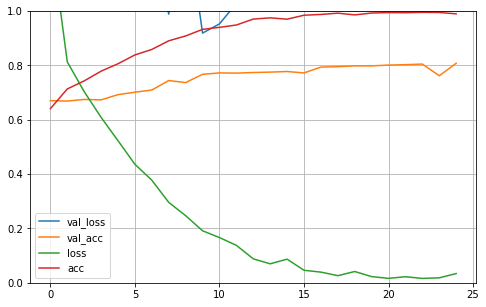

In [0]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [0]:
# predict
pred=model_mobilenet.predict(mat_data_test)

# conf mat
cnf_mat_1 = confusion_matrix(label_test,list(map(np.argmax,pred)))
row_sums_1 = cnf_mat_1.sum(axis=1, keepdims=True)
cnf_p_1 = cnf_mat_1/row_sums_1

# view confusion matrix in class accuracy %
cnf_mat_1 = confusion_matrix(label_test,list(map(np.argmax,pred)))
row_sums_1 = cnf_mat_1.sum(axis=1, keepdims=True)
cnf_p_1 = cnf_mat_1/row_sums_1
class_acc_1 = np.diag(cnf_p_1)
#class_acc_1
class_acc_df = pd.DataFrame({ 'Class':df_dx['val'].values, 'Acc':class_acc_1 })

#cnf_df = pd.DataFrame(data=cnf_mat,columns=df_dx['val'].values , index=df_dx['val'].values )
cnf_p_df = pd.DataFrame(data=cnf_p_1,columns=df_dx['val'].values , index=df_dx['val'].values )
cnf_df

,akiec,bcc,bkl,df,nv,vasc,mel
akiec,14,2,10,0,5,0,2
bcc,6,23,5,0,16,0,1
bkl,8,1,57,0,39,1,4
df,0,0,3,1,8,0,0
nv,3,3,17,0,640,3,5
vasc,0,0,2,0,6,6,0
mel,6,3,14,1,64,1,22


In [0]:
class_acc_df

,Class,Acc
0,akiec,0.424242
1,bcc,0.450980
2,bkl,0.518182
3,df,0.083333
4,nv,0.953800
5,vasc,0.428571
6,mel,0.198198


In [0]:
from sklearn.metrics import precision_recall_curve, precision_score,recall_score
p = precision_score(mat_label_test,pred)

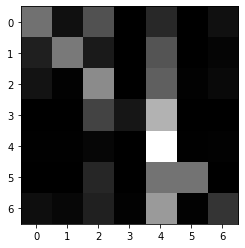

In [0]:
plt.imshow(cnf_p_1,cmap=plt.cm.gray)

**Pretrained MobileNet -Feature Extraction using Data Augmentation**


In [10]:
# Setting up Image generator

train_dir='/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Train_Test_Val_Data_Augmentation/train'
val_dir='/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Train_Test_Val_Data_Augmentation/test'
test_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Train_Test_Val_Data_Augmentation/val'

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, horizontal_flip=True,fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(128,128), batch_size=32, class_mode='categorical',shuffle=True)

val_generator = val_datagen.flow_from_directory(val_dir, target_size=(128,128), batch_size=32, class_mode='categorical', shuffle=True)



Found 8111 images belonging to 7 classes.
Found 1002 images belonging to 7 classes.


In [20]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = val_datagen.flow_from_directory(test_dir, target_size=(128,128), batch_size=32, class_mode='categorical', shuffle=True)

Found 902 images belonging to 7 classes.


In [0]:
train_size=8111 
val_size = 1002 
test_size = 902

batch_size=32

In [14]:
from tensorflow import  keras
#tf.compat.v1.disable_eager_execution()
from keras.applications import MobileNet
from keras import layers, regularizers, optimizers
from keras import models

base_mobilenet = MobileNet(weights='imagenet',include_top=False, input_shape=(128,128,3))
#base_mobilenet = MobileNet(weights='imagenet', input_shape=(128,128,3))
#base_mobilenet.summary()

model_mobilenet=models.Sequential()

#base_mobilenet = MobileNet(weights='imagenet',include_top=False, input_shape=(128,128,3))
model_mobilenet.add(base_mobilenet)

#connecting covnet o/p to dense layer
model_mobilenet.add(layers.Flatten())  # flatten output of covnet (3,3, 64) (h,w,channels) to 3*3*64
model_mobilenet.add(layers.Dropout(0.4))
model_mobilenet.add(layers.Dense(1024,activation='relu'))
model_mobilenet.add(layers.Dropout(0.3))
model_mobilenet.add(layers.Dense(128,activation='relu'))
model_mobilenet.add(layers.Dropout(0.2))
model_mobilenet.add(layers.Dense(64,activation='relu'))
model_mobilenet.add(layers.Dense(7,activation='sigmoid'))

model_mobilenet.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_128 (Model)   (None, 4, 4, 1024)        3228864   
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16384)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              16778240  
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               131200    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [0]:
print('Total weights : ',len(model_mobilenet.weights))
print('Trainable weights : ',len(model_mobilenet.trainable_weights))
print('Non Trainable weights : ',len(model_mobilenet.non_trainable_weights))

Total weights :  143
Trainable weights :  89
Non Trainable weights :  54


In [15]:
#compiling 
model_mobilenet.compile(optimizer= optimizers.RMSprop(lr=1e-4) ,loss='categorical_crossentropy',metrics=['acc'])

history=model_mobilenet.fit_generator(train_generator,steps_per_epoch=(train_size/batch_size),epochs=40,validation_data=val_generator,validation_steps=(val_size/batch_size))
model_mobilenet.save('CNN_MobileNet_May5_DA.h5')

Epoch 1/40
254/253 [==============================] - 345s 1s/step - loss: 0.9547 - acc: 0.6702 - val_loss: 3.2532 - val_acc: 0.6697
Epoch 2/40
254/253 [==============================] - 127s 501ms/step - loss: 0.7818 - acc: 0.6767 - val_loss: 1.2304 - val_acc: 0.6707
Epoch 3/40
254/253 [==============================] - 127s 500ms/step - loss: 0.7110 - acc: 0.6875 - val_loss: 0.6937 - val_acc: 0.6796
Epoch 4/40
254/253 [==============================] - 127s 500ms/step - loss: 0.6532 - acc: 0.7475 - val_loss: 1.2438 - val_acc: 0.7385
Epoch 5/40
254/253 [==============================] - 128s 505ms/step - loss: 0.5970 - acc: 0.7851 - val_loss: 0.8280 - val_acc: 0.7565
Epoch 6/40
254/253 [==============================] - 127s 499ms/step - loss: 0.5555 - acc: 0.8073 - val_loss: 1.0964 - val_acc: 0.7625
Epoch 7/40
254/253 [==============================] - 127s 502ms/step - loss: 0.5051 - acc: 0.8211 - val_loss: 1.7806 - val_acc: 0.7844
Epoch 8/40
254/253 [==============================]

In [21]:
# test accuracy
test_loss, test_acc = model_mobilenet.evaluate_generator(test_generator, steps=50)    # change model name
print('Test Loss : ',test_loss,' Test Acc : ',test_acc)                               # test loss = 0.66, test_acc = 0.76

Test Loss :  2.1438980102539062  Test Acc :  0.8329097628593445


In [22]:
# test accuracy
test_loss_2, test_acc_2 = model_mobilenet.evaluate_generator(test_generator, steps=(test_size/batch_size))    # change model name
print('Test Loss : ',test_loss_2,' Test Acc : ',test_acc_2)                                                    # test loss = 0.66, test_acc = 0.76

Test Loss :  0.3546014726161957  Test Acc :  0.8292682766914368


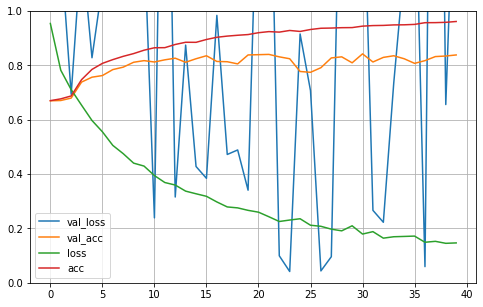

In [18]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [44]:
# setting up a test generator for prediction
pred_datagen = ImageDataGenerator(rescale=1./255)
pred_generator = pred_datagen.flow_from_directory(test_dir, target_size=(128,128), batch_size=20 ,class_mode=None, shuffle=False)

Found 902 images belonging to 7 classes.


In [24]:
# predict
pred=model_mobilenet.predict_generator(pred_generator, steps=902/20)

46/45 [==============================] - 17s 360ms/step


In [61]:
# predict
pred=model_mobilenet.predict_generator(pred_generator, steps=902/20)
true_val = pred_generator.classes
#len(true_val)
predicted = list(map(np.argmax,pred))


# conf mat
cnf_mat_2 = confusion_matrix(true_val,predicted)
row_sums_2 = cnf_mat_2.sum(axis=1, keepdims=True)
cnf_p_2 = cnf_mat_2/row_sums_2

# view confusion matrix in class accuracy %
class_acc_2 = np.diag(cnf_p_2)
#class_acc_1
class_acc_df_2 = pd.DataFrame({ 'Class':df_dx['val'].values, 'Acc':class_acc_2 })

#cnf_df = pd.DataFrame(data=cnf_mat,columns=df_dx['val'].values , index=df_dx['val'].values )
cnf_df_2 = pd.DataFrame(data=cnf_mat_2,columns=df_dx['val'].values , index=df_dx['val'].values )
cnf_df_2

,akiec,bcc,bkl,df,nv,vasc,mel
akiec,4,4,7,3,11,1,0
bcc,3,27,7,2,4,3,0
bkl,0,0,63,4,7,25,0
df,0,0,2,8,0,0,0
nv,0,1,9,0,63,27,0
vasc,0,1,12,1,14,576,0
mel,0,0,0,0,3,3,7


In [62]:
class_acc_df_2

,Class,Acc
0,akiec,0.133333
1,bcc,0.586957
2,bkl,0.636364
3,df,0.800000
4,nv,0.630000
5,vasc,0.953642
6,mel,0.538462


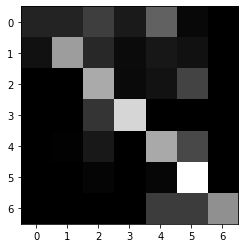

In [63]:
plt.imshow(cnf_p_2,cmap=plt.cm.gray)

**MobileNet - Balanced Images**

In [5]:
# Setting up Image generator to Balanced class folder

train_dir='/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Balanced_Data'
val_dir='/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Train_Test_Val_Data_Augmentation/test'
test_dir = '/content/gdrive/My Drive/Deep Learning Project/Skin Cancer Detection/dataset/RR_Train_Test_Val_Data_Augmentation/val'

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, horizontal_flip=True,fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=32, class_mode='categorical',shuffle=True)

val_generator = val_datagen.flow_from_directory(val_dir, target_size=(150,150), batch_size=32, class_mode='categorical', shuffle=True)



Found 38853 images belonging to 7 classes.
Found 1002 images belonging to 7 classes.


In [0]:
train_size=38853  
val_size = 1002 
test_size = 902

batch_size=128

In [7]:
from tensorflow import  keras
#tf.compat.v1.disable_eager_execution()
from keras.applications import MobileNet
from keras import layers, regularizers, optimizers
from keras import models

base_mobilenet = MobileNet(weights='imagenet',include_top=False, input_shape=(150,150,3))
#base_mobilenet = MobileNet(weights='imagenet', input_shape=(128,128,3))
#base_mobilenet.summary()

model_mobilenet=models.Sequential()

#base_mobilenet = MobileNet(weights='imagenet',include_top=False, input_shape=(128,128,3))
model_mobilenet.add(base_mobilenet)

#connecting covnet o/p to dense layer
model_mobilenet.add(layers.Flatten())  # flatten output of covnet (3,3, 64) (h,w,channels) to 3*3*64
model_mobilenet.add(layers.Dropout(0.4))
model_mobilenet.add(layers.Dense(1024,activation='relu'))
model_mobilenet.add(layers.Dropout(0.3))
model_mobilenet.add(layers.Dense(128,activation='relu'))
model_mobilenet.add(layers.Dropout(0.2))
model_mobilenet.add(layers.Dense(64,activation='relu'))
model_mobilenet.add(layers.Dense(7,activation='sigmoid'))

model_mobilenet.summary()


/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


17227776/17225924 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 4, 4, 1024)        3228864   
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16384)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              16778240  
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               131200    
_______________________________________________________

In [8]:
print('Total weights : ',len(model_mobilenet.weights))
print('Trainable weights : ',len(model_mobilenet.trainable_weights))
print('Non Trainable weights : ',len(model_mobilenet.non_trainable_weights))

Total weights :  143
Trainable weights :  89
Non Trainable weights :  54


In [10]:
#compiling 
model_mobilenet.compile(optimizer= optimizers.RMSprop(lr=1e-4) ,loss='categorical_crossentropy',metrics=['acc'])

history=model_mobilenet.fit_generator(train_generator,steps_per_epoch=250,epochs=25,validation_data=val_generator,validation_steps=(val_size/32))
model_mobilenet.save('CNN_MobileNet_May5_DA_Balanced.h5')

Epoch 1/25
250/250 [==============================] - 2523s 10s/step - loss: 1.5976 - acc: 0.3550 - val_loss: 0.9154 - val_acc: 0.6916
Epoch 2/25
250/250 [==============================] - 2177s 9s/step - loss: 1.0557 - acc: 0.6326 - val_loss: 1.2891 - val_acc: 0.6916
Epoch 3/25
250/250 [==============================] - 2286s 9s/step - loss: 0.8505 - acc: 0.7109 - val_loss: 0.9227 - val_acc: 0.6966
Epoch 4/25
250/250 [==============================] - 2268s 9s/step - loss: 0.7255 - acc: 0.7494 - val_loss: 0.5412 - val_acc: 0.7066
Epoch 5/25
250/250 [==============================] - 1940s 8s/step - loss: 0.6631 - acc: 0.7794 - val_loss: 3.5215 - val_acc: 0.7066
Epoch 6/25
250/250 [==============================] - 96s 383ms/step - loss: 0.5578 - acc: 0.8084 - val_loss: 1.6118 - val_acc: 0.6976
Epoch 7/25
250/250 [==============================] - 95s 379ms/step - loss: 0.5269 - acc: 0.8229 - val_loss: 5.4630 - val_acc: 0.7026
Epoch 8/25
250/250 [==============================] - 95s 3

In [0]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [0]:
# test accuracy
test_loss, test_acc = model_mobilenet.evaluate_generator(test_generator, steps=50)    # change model name
print('Test Loss : ',test_loss,' Test Acc : ',test_acc)                               # test loss = 0.66, test_acc = 0.76

In [11]:
# setting up a test generator for prediction
pred_datagen = ImageDataGenerator(rescale=1./255)
pred_generator = pred_datagen.flow_from_directory(test_dir, target_size=(128,128), batch_size=20 ,class_mode=None, shuffle=False)

Found 902 images belonging to 7 classes.


In [0]:
# predict
pred=model_mobilenet.predict_generator(pred_generator, steps=902/20)
true_val = pred_generator.classes
#len(true_val)
predicted = list(map(np.argmax,pred))


# conf mat
cnf_mat_3 = confusion_matrix(true_val,predicted)
row_sums_3 = cnf_mat_3.sum(axis=1, keepdims=True)
cnf_p_3 = cnf_mat_3/row_sums_3

# view confusion matrix in class accuracy %
class_acc_3 = np.diag(cnf_p_3)
#class_acc_1
class_acc_df_3 = pd.DataFrame({ 'Class':df_dx['val'].values, 'Acc':class_acc_3 })

#cnf_df = pd.DataFrame(data=cnf_mat,columns=df_dx['val'].values , index=df_dx['val'].values )
cnf_df_3 = pd.DataFrame(data=cnf_mat_3,columns=df_dx['val'].values , index=df_dx['val'].values )
cnf_df_3